#Integrantes
Állex Brandão RM: 557897

Joyce Melo RM:558294

Maria Clara Brito RM: 558899

Pedro Bortoli RM: 554877





# Checkpoint 1

## Carregar módulos

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [365]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [366]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [367]:
dados_paises_covid.tail(50)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
239,NaN,South Africa,-30.559500,22.937500,0,0,0,0,0,0,...,4063573,4063863,4064457,4064889,4064889,4064889,4065857,4066044,4066641,4067067
240,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,18368,18368,18368,18368,18368,18368,18368,18368,18368,18368
241,NaN,Spain,40.463667,-3.749220,0,0,0,0,0,0,...,13763336,13763336,13763336,13770429,13770429,13770429,13770429,13770429,13770429,13770429
242,NaN,Sri Lanka,7.873054,80.771797,0,0,0,0,0,1,...,672030,672031,672031,672032,672032,672034,672034,672036,672037,672039
243,NaN,Sudan,12.862800,30.217600,0,0,0,0,0,0,...,63787,63809,63809,63809,63809,63809,63809,63809,63829,63829
244,NaN,Summer Olympics 2020,35.649100,139.773700,0,0,0,0,0,0,...,865,865,865,865,865,865,865,865,865,865
245,NaN,Suriname,3.919300,-56.027800,0,0,0,0,0,0,...,82227,82467,82467,82467,82467,82467,82467,82467,82467,82467
246,NaN,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,2697827,2697827,2698535,2698535,2698535,2698535,2698535,2698535,2698535,2699339
247,NaN,Switzerland,46.818200,8.227500,0,0,0,0,0,0,...,4412439,4412439,4412439,4412439,4412439,4412439,4412439,4413911,4413911,4413911
248,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,57467,57467,57467,57467,57467,57467,57467,57467,57467,57467


## Ajustes



- Nomes das colunas

In [368]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [369]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [370]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [371]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [372]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [373]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [374]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [375]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [376]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [377]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [378]:
dados_paises_covid_dead

,province,country,Lat,Long,date,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057


In [379]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [380]:
dados_paises_covid.shape

(330327, 6)

In [381]:
dados_paises_covid_dead.shape

(330327, 6)

In [382]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [383]:
dados_covid


,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


In [384]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho

## Questão 1-nº de países

In [385]:
dados_covid['date'].max()

Timestamp('2023-03-09 00:00:00')

In [386]:
#usamos o unique para que cada 'item' no campo 'country' aparecesse uma única vez
#Em seguida fizemos um filtro a olho para tirarmos os 'itens' que estavam erroneamente em 'country'
#Então fizemos uma subtração para tirar esses itens
paises = dados_paises_covid["country"].unique()
len(paises) - 5

196

##Questão 2 - Casos de infectados


In [387]:
#o drop foi usado unicamente para filtrar os dados e aparecer unicamente as informações solicitadas
dados_us=dados_covid.drop(columns=['province','Lat','Long','date'])

In [388]:
dados_us=dados_us[dados_us['country'].isin(['US'])].max().reset_index()
dados_us

,index,0
0,country,US
1,infected,103802702
2,dead,1123836


In [389]:
#o drop foi usado unicamente para filtrar os dados e aparecer unicamente as informações solicitadas
dados_br=dados_covid.drop(columns=['province','Lat','Long','date'])

In [390]:
dados_br=dados_br[dados_br['country'].isin(['Brazil'])].max().reset_index()
dados_br

,index,0
0,country,Brazil
1,infected,37081209
2,dead,699276


In [391]:
#o drop foi usado unicamente para filtrar os dados e aparecer unicamente as informações solicitadas
dados_italy=dados_covid.drop(columns=['province','Lat','Long','date'])

In [392]:
dados_italy=dados_italy[dados_italy['country'].isin(['Italy'])].max().reset_index()
dados_italy

,index,0
0,country,Italy
1,infected,25603510
2,dead,188322


##Questão 3-maiores infect

In [393]:
#como eu quero os maiores valores eu pego a última data disponível
dados_novos=dados_covid[dados_covid['date'] == '2023-03-09']


In [394]:
#criando uma variavel para pegar os 10 maiores paides infectados
dados_infectados=dados_novos.groupby(['country'])['infected'].sum().reset_index()


In [395]:
dados_infectados.sort_values('infected',ascending = False).head(10)

,country,infected
186,US,103802702
80,India,44690738
63,France,39866718
67,Germany,38249060
24,Brazil,37076053
88,Japan,33320438
94,"Korea, South",30615522
86,Italy,25603510
190,United Kingdom,24658705
147,Russia,22075858


In [396]:
dados_mortes=dados_novos.groupby('country')['dead'].sum().reset_index()

In [397]:
dados_mortes.sort_values('dead', ascending=False).head(10)

,country,dead
186,US,1123836
24,Brazil,699276
80,India,530779
147,Russia,388478
117,Mexico,333188
190,United Kingdom,220721
141,Peru,219539
86,Italy,188322
67,Germany,168935
63,France,166176


#Questão 4-taxa de letalidade

In [398]:
#filtro com as informações necessarias para criar uma nova coluna 'taxa de letalidade'
dados_atualizados= dados_covid.groupby('country')[['infected','dead']].sum().reset_index()

In [399]:
#coluna criada
dados_atualizados['taxa de letalidade']=dados_atualizados['dead']/dados_atualizados['infected']

In [400]:
#essa linhas de código é para filtrar a tabela para que apareça somente as informações solicitadas
dados_taxa=dados_atualizados.drop(columns=['infected', 'dead'])

In [401]:
dados_taxa.sort_values('taxa de letalidade', ascending=False).head(10)

,country,taxa de letalidade
93,"Korea, North",6.000000
107,MS Zaandam,0.222038
198,Yemen,0.192329
169,Sudan,0.074083
141,Peru,0.068316
117,Mexico,0.061125
174,Syria,0.058584
54,Egypt,0.051551
164,Somalia,0.050253
53,Ecuador,0.045265


##R: A taxa de letalidade tem grande importância para fazer análises, principalmente, quanto as condições de saúde daquele país e a capacidade do governo de lidar com esse problema. Por outro lado, países com poucos dados, ou casos podem facilmente conduzir análises de uma maneira errônea. Por exemplo a Coréia do Norte tem uma taxa de letalidade de 6, o que é impossível, e indica um erro no dataframe, mas mesmo que os dados estivessem corretos, poucos casos como os relatados pela mesma torna esse, um índice irrelevante para análise.

##Questão 5

###Letra A

In [402]:
Brazil_infectados = dados_paises_covid[dados_paises_covid['country']== 'Brazil']

Text(0.5, 1.0, 'Infectados por covid no Brasil ao longo dos anos')

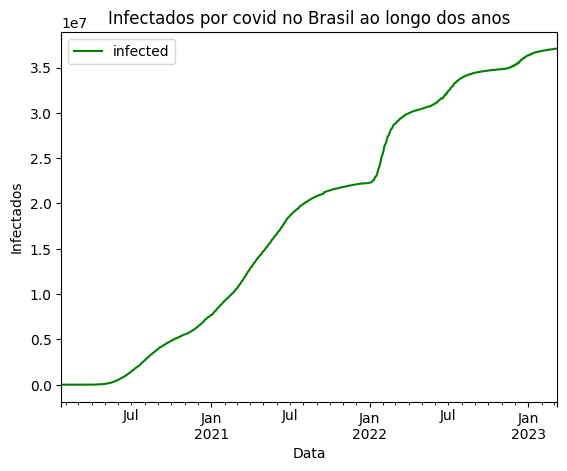

In [403]:
Brazil_infectados.plot.line(x = 'date', y = 'infected', color='g')
plt.xlabel("Data")
plt.ylabel("Infectados")
plt.title('Infectados por covid no Brasil ao longo dos anos')


In [404]:
USA_infectados = dados_paises_covid[dados_paises_covid['country'] == 'US']

Text(0.5, 1.0, 'Infectados por covid nos EUA ao longo dos anos')

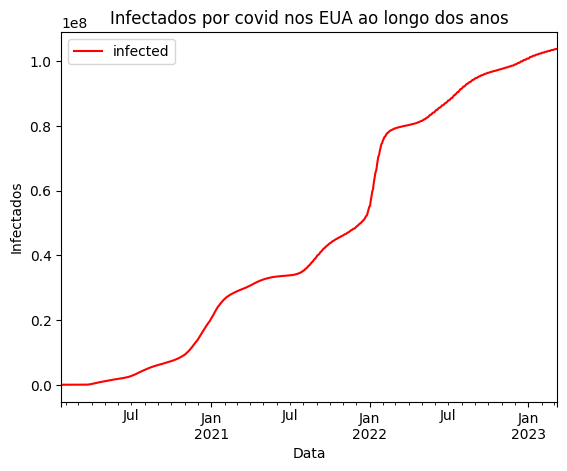

In [405]:
USA_infectados.plot.line(x = 'date', y = 'infected', color='r')
plt.xlabel("Data")
plt.ylabel("Infectados")
plt.title('Infectados por covid nos EUA ao longo dos anos')

###Letra B

In [406]:
Brazil_infectados = dados_paises_covid_dead[dados_paises_covid['country']== 'Brazil']

Text(0.5, 1.0, 'Mortes por covid no Brasil por covid ao longo dos anos')

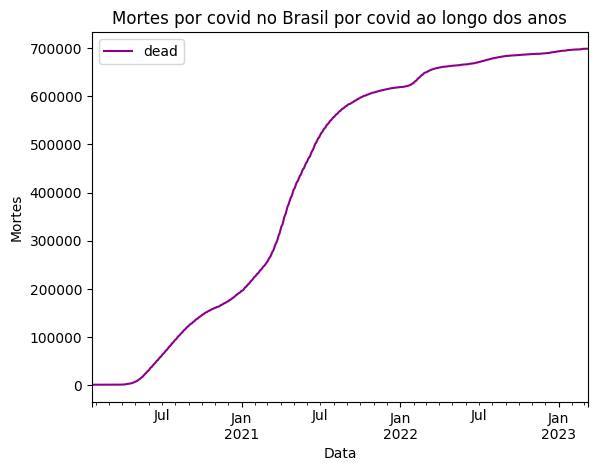

In [407]:
Brazil_infectados.plot.line(x = 'date', y = 'dead', color='darkmagenta')
plt.xlabel("Data")
plt.ylabel("Mortes")
plt.title('Mortes por covid no Brasil por covid ao longo dos anos')

In [408]:
US_infectados = dados_paises_covid_dead[dados_paises_covid['country']== 'US']

Text(0.5, 1.0, 'Mortes por covid nos EUA ao longo dos anos')

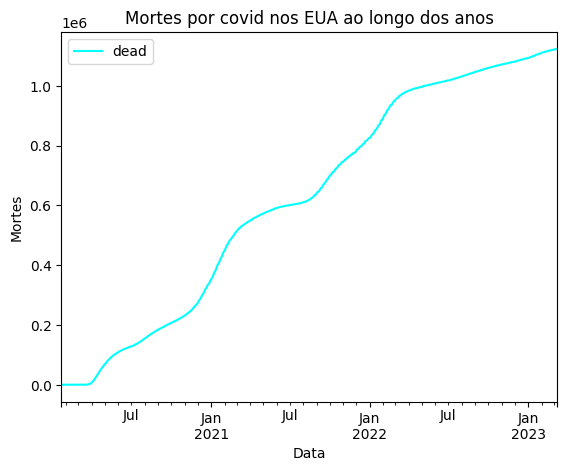

In [409]:
US_infectados.plot.line(x = 'date', y = 'dead', color='aqua')
plt.xlabel("Data")
plt.ylabel("Mortes")
plt.title('Mortes por covid nos EUA ao longo dos anos')

### Letra C

In [410]:
#filtro para os países solicitados
grafico_infectado = dados_covid[dados_covid['country'].isin(['Brazil', 'US'])]

In [411]:
#filtro para a data solicitada
grafico_infectado=grafico_infectado[grafico_infectado['date'].isin(['2023-2-1'])]

In [412]:
grafico_infectado=grafico_infectado.drop(columns= ['dead','Lat','Long','province','date'])

In [413]:
grafico_infectado

,country,infected
319665,Brazil,36837943
319894,US,102479379


Text(0.5, 1.0, 'Infectados por covid')

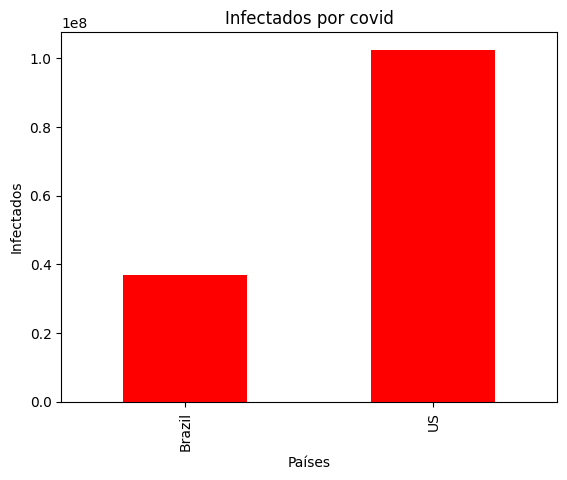

In [414]:
#grafico comparativo(br e eua)
grafico_infectado.plot.bar(x = 'country', y = 'infected', legend = None, color= 'r')
plt.xlabel("Países")
plt.ylabel("Infectados")
plt.title('Infectados por covid')

###Letra D

In [415]:
#organizando a tabela
dm = dados_paises_covid_dead

In [416]:
dmp = dm[['country', 'dead', 'date']]

In [417]:
dmp

,country,dead,date
0,Afghanistan,0,2020-01-22
1,Albania,0,2020-01-22
2,Algeria,0,2020-01-22
3,Andorra,0,2020-01-22
4,Angola,0,2020-01-22
...,...,...,...
330322,West Bank and Gaza,5708,2023-03-09
330323,Winter Olympics 2022,0,2023-03-09
330324,Yemen,2159,2023-03-09
330325,Zambia,4057,2023-03-09


In [418]:
dmp_filtrada = dmp[dmp['country'].isin(['Brazil', 'US'])]

In [419]:
dmp_filt = dmp_filtrada[dmp_filtrada['date'].isin(['2023-2-1'])]

Text(0.5, 1.0, 'Mortos por covid')

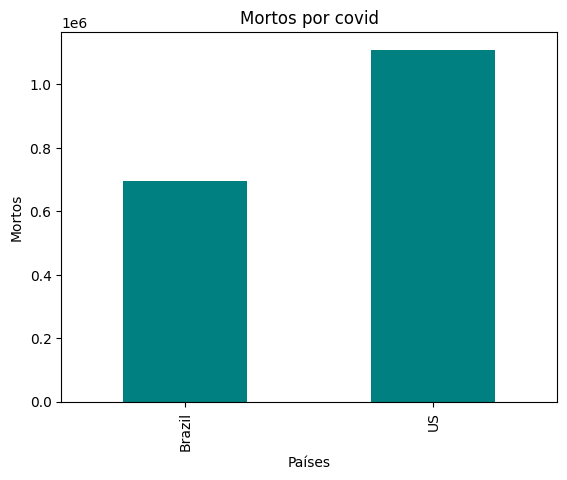

In [420]:
#grafico comparativo(br e eua)
dmp_filt.plot.bar(x = 'country', y = 'dead', legend = None, color="teal")
plt.xlabel("Países")
plt.ylabel("Mortos")
plt.title('Mortos por covid')

###Letra E

In [421]:
#iniciando organização da tabela
da = dados_atualizados

In [422]:
dap = da[['country', 'taxa de letalidade']]

In [423]:
dap_filt = dap[dap['country'].isin(['Brazil', 'US'])]

Text(0.5, 1.0, 'Taxa de letalidade')

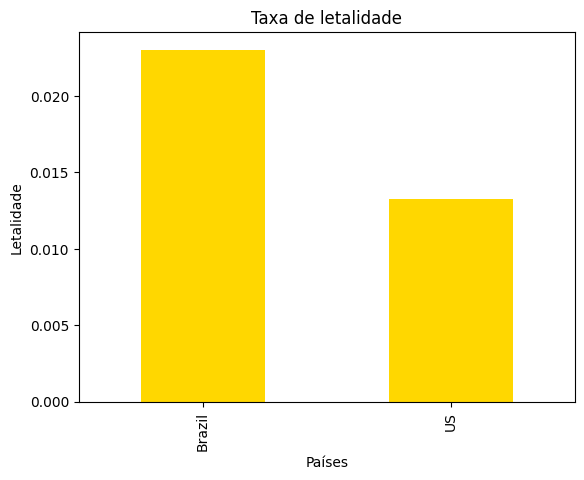

In [424]:
#gerando gráfico letalidade
dap_filt.plot.bar(x = 'country', y = 'taxa de letalidade', legend = None, color="gold")
plt.xlabel("Países")
plt.ylabel("Letalidade")
plt.title('Taxa de letalidade')